<a href="https://colab.research.google.com/github/Davidarr96/Proyecto1_MLoperations/blob/main/EDA_ML.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Análisis exploratorio de los datos: (Exploratory Data Analysis-EDA)

In [4]:
pip install ydata_profiling

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 345.9/345.9 kB 22.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 33.7/33.7 MB 32.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.8/11.8 MB 70.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 102.7/102.7 kB 12.8 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 679.5/679.5 kB 44.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 78.5/78.5 kB 8.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 296.5/296.5 kB 31.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.7/4.7 MB 93.9 MB/s eta 0:00:00
  Created wheel for htmlmin: filename=htmlmin-0.1.12-py3-none-any.whl size=27081 sha256=17b3ed5b3bbb75c5f3f7e1811d7181a710392a176931b9f4b693c7ed1908bae0
  Stored in directory: /root/.cache/pip/wheels/dd/91/29/a79cec

In [1]:
# Vinculamos google colab con google drive para importar el dataset
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [5]:
# Importamos librerias

import matplotlib.pyplot as plt
import missingno as msno
import numpy as np
import pandas as pd
import seaborn as sns
from ydata_profiling import ProfileReport

In [6]:
# Levantamos el datasets a analizar, y guardamos en una variable
data_movie = pd.read_csv('/content/drive/MyDrive/datatsets/data_movies.csv', sep=',', encoding='utf-8')

<ipython-input-6-6c8fabdcb330>:2: DtypeWarning: Columns (6) have mixed types. Specify dtype option on import or set low_memory=False.
  data_movie = pd.read_csv('/content/drive/MyDrive/datatsets/data_movies.csv', sep=',', encoding='utf-8')


In [7]:
# Cantidad de filas y columnas del dataset

print("Cant registros:", data_movie.shape[0])
print("Cant columnas:", data_movie.shape[1])

Cant registros: 45379
Cant columnas: 19


In [8]:
# Visualizamos las columnas del dataset y sus primeros registros
data_movie.head()

,belongs_to_collection,budget,genres,id,original_language,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,vote_average,release_year,return
0,Toy Story Collection,30000000.0,"['Animation', 'Comedy', 'Family']",862,en,"Led by Woody, Andy's toys live happily in his ...",21.946943,['Pixar Animation Studios'],['United States of America'],1995-10-30,373554033.0,81.0,['English'],Released,NaN,Toy Story,7.7,1995.0,12.451801
1,NaN,65000000.0,"['Adventure', 'Fantasy', 'Family']",8844,en,When siblings Judy and Peter discover an encha...,17.015539,"['TriStar Pictures', 'Teitler Film', 'Intersco...",['United States of America'],1995-12-15,262797249.0,104.0,"['English', 'Français']",Released,Roll the dice and unleash the excitement!,Jumanji,6.9,1995.0,4.043035
2,Grumpy Old Men Collection,0.0,"['Romance', 'Comedy']",15602,en,A family wedding reignites the ancient feud be...,11.7129,"['Warner Bros.', 'Lancaster Gate']",['United States of America'],1995-12-22,0.0,101.0,['English'],Released,Still Yelling. Still Fighting. Still Ready for...,Grumpier Old Men,6.5,1995.0,0.000000
3,NaN,16000000.0,"['Comedy', 'Drama', 'Romance']",31357,en,"Cheated on, mistreated and stepped on, the wom...",3.859495,['Twentieth Century Fox Film Corporation'],['United States of America'],1995-12-22,81452156.0,127.0,['English'],Released,Friends are the people who let you be yourself...,Waiting to Exhale,6.1,1995.0,5.090760
4,Father of the Bride Collection,0.0,['Comedy'],11862,en,Just when George Banks has recovered from his ...,8.387519,"['Sandollar Productions', 'Touchstone Pictures']",['United States of America'],1995-02-10,76578911.0,106.0,['English'],Released,Just When His World Is Back To Normal... He's ...,Father of the Bride Part II,5.7,1995.0,0.000000


In [9]:
# Verificamos si existen valores nulos o faltantes.

data_movie.isna().sum()

belongs_to_collection    40891
budget                       0
genres                    2384
id                           0
original_language           11
overview                   941
popularity                   2
production_companies     11799
production_countries      6214
release_date                 3
revenue                      0
runtime                    249
spoken_languages          3771
status                      83
tagline                  24981
title                        3
vote_average                 3
release_year                 3
return                       0
dtype: int64

In [14]:
# Informacion sobre el tipo de dato de las columnas
data_movie.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45379 entries, 0 to 45378
Data columns (total 19 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   belongs_to_collection  4488 non-null   object 
 1   budget                 45379 non-null  float64
 2   genres                 42995 non-null  object 
 3   id                     45379 non-null  object 
 4   original_language      45368 non-null  object 
 5   overview               44438 non-null  object 
 6   popularity             45377 non-null  object 
 7   production_companies   33580 non-null  object 
 8   production_countries   39165 non-null  object 
 9   release_date           45376 non-null  object 
 10  revenue                45379 non-null  float64
 11  runtime                45130 non-null  float64
 12  spoken_languages       41608 non-null  object 
 13  status                 45296 non-null  object 
 14  tagline                20398 non-null  object 
 15  ti

In [10]:
# Chequeamos los valores numericos del datasets con las medias estadísticas

data_movie.describe()

,budget,revenue,runtime,vote_average,release_year,return
count,4.537900e+04,4.537900e+04,45130.000000,45376.000000,45376.000000,4.537900e+04
mean,4.232325e+06,1.122936e+07,94.181675,5.624070,1991.881193,6.599991e+02
std,1.743932e+07,6.438789e+07,38.341059,1.915423,24.055360,7.469083e+04
min,0.000000e+00,0.000000e+00,0.000000,0.000000,1874.000000,0.000000e+00
25%,0.000000e+00,0.000000e+00,85.000000,5.000000,1978.000000,0.000000e+00
50%,0.000000e+00,0.000000e+00,95.000000,6.000000,2001.000000,0.000000e+00
75%,0.000000e+00,0.000000e+00,107.000000,6.800000,2010.000000,0.000000e+00
max,3.800000e+08,2.787965e+09,1256.000000,10.000000,2020.000000,1.239638e+07


Text(0, 0.5, 'Sampe Number')

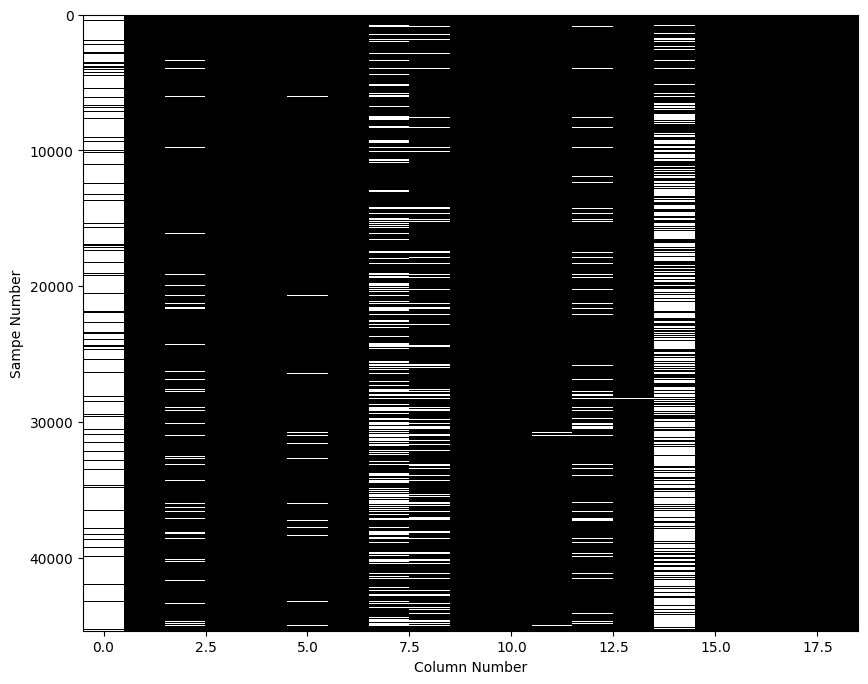

In [11]:
#Chequeamos el grafico con la cantidad de nulos
plt.figure(figsize=(10, 8))
plt.imshow(data_movie.isna(), aspect='auto',
           interpolation='nearest', cmap='gray')
plt.xlabel('Column Number')
plt.ylabel('Sampe Number') 

<Axes: title={'center': 'Porcentaje de valores faltantes por columna'}, ylabel='Relación de valores perdidos por columna'>

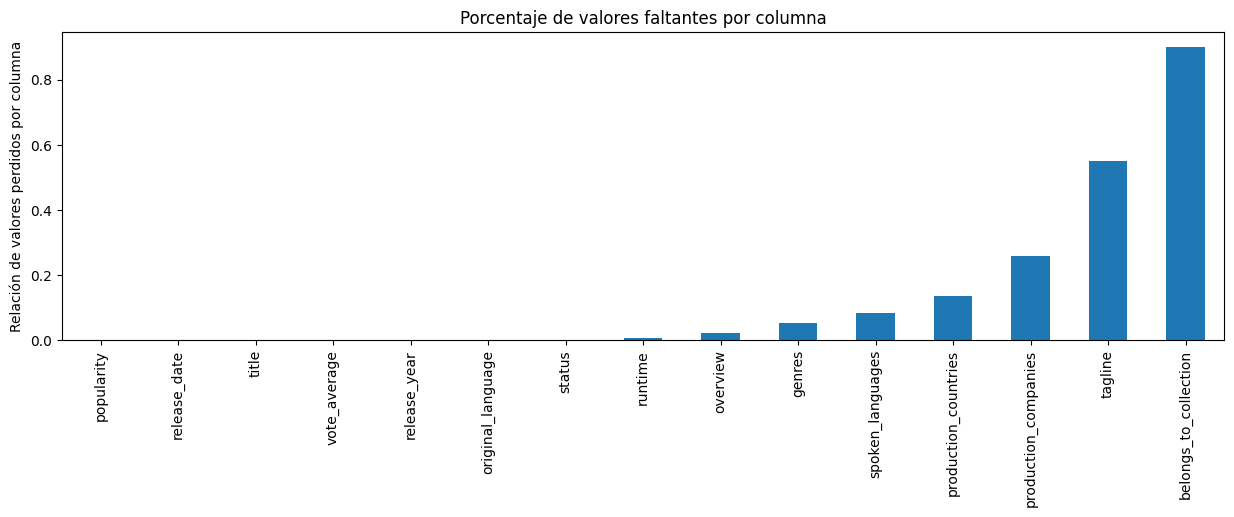

In [12]:
#Realizamos un gráfico de barras para observar la columna con mas valores faltantes
mask = data_movie.isna().any(axis=0)
data_movie.isna().mean()[mask].sort_values().plot(
    kind='bar', figsize=(15, 4),
    title='Porcentaje de valores faltantes por columna',
    ylabel='Relación de valores perdidos por columna'
)

In [13]:
data_movie.isnull().sum().sort_values(ascending=False)


belongs_to_collection    40891
tagline                  24981
production_companies     11799
production_countries      6214
spoken_languages          3771
genres                    2384
overview                   941
runtime                    249
status                      83
original_language           11
release_year                 3
vote_average                 3
title                        3
release_date                 3
popularity                   2
revenue                      0
budget                       0
id                           0
return                       0
dtype: int64

In [15]:
#Reemplazamos los valores nulos/faltantes de las columnas
#Las columas del tipo de dato "object" los reemplazamos por "sin dato"
#Las columnas con el tipo de dato "float" por "0"
data_movie['belongs_to_collection'].fillna('sin dato', inplace = True)
data_movie['genres'].fillna('sin dato', inplace = True)
data_movie['original_language'].fillna('sin dato', inplace = True)
data_movie['overview'].fillna('sin dato', inplace = True)
data_movie['popularity'].fillna('sin dato', inplace = True)
data_movie['production_companies'].fillna('sin dato', inplace = True)
data_movie['production_countries'].fillna('sin dato', inplace = True)
data_movie['release_date'].fillna('sin dato', inplace = True)
data_movie['runtime'].fillna('0', inplace = True)
data_movie['spoken_languages'].fillna('sin dato', inplace = True)
data_movie['status'].fillna('sin dato', inplace = True)
data_movie['tagline'].fillna('sin dato', inplace = True)
data_movie['title'].fillna('sin dato', inplace = True)
data_movie['vote_average'].fillna('0', inplace = True)
data_movie['release_year'].fillna('0', inplace = True)



In [16]:
# En caso que existan, eliminamos registros repetidos

data_movie.drop_duplicates(inplace=True)
print("Cant registros:", data_movie.shape[0])
     

Cant registros: 45366


In [17]:
#Chequeamos que no hayan valores nulos ni faltantes
data_movie.isna().sum()

belongs_to_collection    0
budget                   0
genres                   0
id                       0
original_language        0
overview                 0
popularity               0
production_companies     0
production_countries     0
release_date             0
revenue                  0
runtime                  0
spoken_languages         0
status                   0
tagline                  0
title                    0
vote_average             0
release_year             0
return                   0
dtype: int64

In [ ]:
#Visualizamos el tipo de película mas relevantes 
data_movie[data_movie['runtime']>240]['genres'].value_counts()
